In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files 
from matplotlib.pyplot import imshow
%matplotlib inline 

import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from PIL import Image

import sys
print(sys.getrecursionlimit())
sys.setrecursionlimit(1500000)
import cv2

1000


In [4]:
uploaded  = files.upload()


Saving cat.jpg to cat (6).jpg


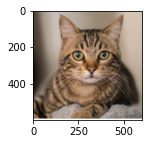

In [37]:
# UPLOADING THE IMAGE

IMAGE = Image.open("cat.jpg")
displaySizeX = 2
displaySizeY = 2

fig, aux = plt.subplots(figsize = (displaySizeX, displaySizeY))
aux.imshow(IMAGE, cmap="gray")

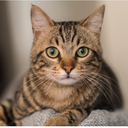

In [38]:
# RESIZING the IMAGE :

IMAGE.load()
IMAGE = IMAGE.resize((128,128), Image.ANTIALIAS)

IMAGE_ARRAY = np.asarray(IMAGE).flatten()
IMAGE_ARRAY = np.array([IMAGE_ARRAY])
IMAGE_ARRAY = IMAGE_ARRAY.astype(np.float32)

cols, rows = IMAGE.size
IMAGE_ARRAY2 = IMAGE_ARRAY.reshape(rows, cols, 3).astype(np.uint8)
IMAGE2 = Image.fromarray(IMAGE_ARRAY2, "RGB")
IMAGE2

# print("the RESIZED image looks :")
# IMAGE2 

# print("the RESIZED image array is :")
# IMAGE_ARRAY2

In [7]:
NUMBER_NEURONS = np.array([2, 5, 10, 20])
print(len(NUMBER_NEURONS))
NUMBER_EPOCHS = np.array([10, 20, 40, 50])
print(len(NUMBER_EPOCHS))

4
4


    10  20  40  50
2    0   0   0   0
5    0   0   0   0
10   0   0   0   0
20   0   0   0   0


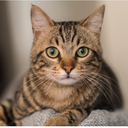

In [8]:
# MAKING a DATAFRAME where to SAVE the IMAGES

ZEROS = np.zeros((len(NUMBER_NEURONS), len(NUMBER_EPOCHS)), dtype=np.int)
Z = pd.DataFrame(ZEROS)
Z.columns = ["10", "20", "40", "50"]
Z.index =["2", "5", "10", "20"]
print(Z)
i = 0
j = 0

IMAGE2

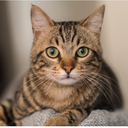

In [9]:
# alternatively, we do define another DATAFRAME where to save the IMAGES

DF = pd.DataFrame()
DF['img'] = [IMAGE2] # Wrap image in python list

# in order to visualize the initial cat
DF['img'].values[0]

In [10]:
print(NUMBER_NEURONS)
print(NUMBER_EPOCHS)

[ 2  5 10 20]
[10 20 40 50]


In [12]:
for x in NUMBER_NEURONS : 
    for y in NUMBER_EPOCHS : 

        model = Sequential()
        model.add(Dense(x, input_dim=IMAGE_ARRAY.shape[1], activation="relu"))
        model.add(Dense(IMAGE_ARRAY.shape[1]))
        model.compile(loss = "mean_squared_error", optimizer = "adam")
        model.summary()
        model.fit(IMAGE_ARRAY, IMAGE_ARRAY, verbose = 0, epochs = y)

        PREDICT = model.predict(IMAGE_ARRAY)

        # resizing the IMAGE 
        cols,rows = IMAGE.size
        IMAGE_ARRAY2 =  PREDICT[0].reshape(rows, cols, 3)
        IMAGE_ARRAY2 = IMAGE_ARRAY2.astype(np.uint8)
        IMAGE2 = Image.fromarray(IMAGE_ARRAY2, "RGB")
        IMAGE2 
            
        # ADDING another ROW to the DATAFRAME in a "DICTIONARY WAY"
        d2 = {'img': [IMAGE2]}
        df2 = pd.DataFrame.from_records(d2)
        DF.append(df2)
        
        # Z.iloc[i, j] = [IMAGE2]
        # j = j + 1
    # i = i + 1
    # j = 0   

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 98306     
                                                                 
 dense_3 (Dense)             (None, 49152)             147456    
                                                                 
Total params: 245,762
Trainable params: 245,762
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 98306     
                                                                 
 dense_5 (Dense)             (None, 49152)             147456    
                                                                 
Total params: 245,762
Trai

1
1
0    <PIL.Image.Image image mode=RGB size=128x128 a...
Name: img, dtype: object


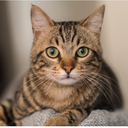

In [16]:
# Surprinsingly, only one image has been saved in the DATAFRAME
print(DF.shape[0])
print(DF.shape[1])
print(DF["img"])
DF['img'].values[0]

In [ ]:
# We define a second way to visualize the IMAGES

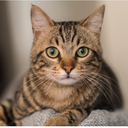

In [45]:
IMAGE_ARRAY
IMAGE


In [28]:
# USING 5 NEURONS and 10 EPOCHS

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 5)                 245765    
                                                                 
 dense_43 (Dense)            (None, 49152)             294912    
                                                                 
Total params: 540,677
Trainable params: 540,677
Non-trainable params: 0
_________________________________________________________________


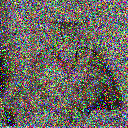

In [29]:
model = Sequential()
model.add(Dense(5, input_dim=IMAGE_ARRAY.shape[1], activation="relu"))
model.add(Dense(IMAGE_ARRAY.shape[1]))
model.compile(loss = "mean_squared_error", optimizer = "adam")
model.summary()
model.fit(IMAGE_ARRAY, IMAGE_ARRAY, verbose = 0, epochs = 10)

PREDICT = model.predict(IMAGE_ARRAY)

cols,rows = IMAGE.size
IMAGE_ARRAY2 = PREDICT[0].reshape(rows, cols, 3)
IMAGE_ARRAY2 = IMAGE_ARRAY2.astype(np.uint8)
IMAGE2 = Image.fromarray(IMAGE_ARRAY2, "RGB")
IMAGE2 

In [ ]:
# USING 10 NEURONS and 10 EPOCHS

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 10)                491530    
                                                                 
 dense_57 (Dense)            (None, 49152)             540672    
                                                                 
Total params: 1,032,202
Trainable params: 1,032,202
Non-trainable params: 0
_________________________________________________________________


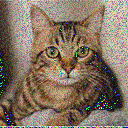

In [41]:
model = Sequential()
model.add(Dense(10, input_dim=IMAGE_ARRAY.shape[1], activation="relu"))
model.add(Dense(IMAGE_ARRAY.shape[1]))
model.compile(loss = "mean_squared_error", optimizer = "adam")
model.summary()
model.fit(IMAGE_ARRAY, IMAGE_ARRAY, verbose = 0, epochs = 20)

PREDICT = model.predict(IMAGE_ARRAY)

cols,rows = IMAGE.size
IMAGE_ARRAY2 = PREDICT[0].reshape(rows, cols, 3)
IMAGE_ARRAY2 = IMAGE_ARRAY2.astype(np.uint8)
IMAGE2 = Image.fromarray(IMAGE_ARRAY2, "RGB")
IMAGE2 

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 10)                491530    
                                                                 
 dense_67 (Dense)            (None, 49152)             540672    
                                                                 
Total params: 1,032,202
Trainable params: 1,032,202
Non-trainable params: 0
_________________________________________________________________


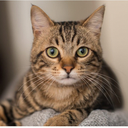

In [47]:
model = Sequential()
model.add(Dense(10, input_dim=IMAGE_ARRAY.shape[1], activation="relu"))
model.add(Dense(IMAGE_ARRAY.shape[1]))
model.compile(loss = "mean_squared_error", optimizer = "adam")
model.summary()
model.fit(IMAGE_ARRAY, IMAGE_ARRAY, verbose = 0, epochs = 100)

PREDICT = model.predict(IMAGE_ARRAY)

cols,rows = IMAGE.size
IMAGE_ARRAY2 = PREDICT[0].reshape(rows, cols, 3)
IMAGE_ARRAY2 = IMAGE_ARRAY2.astype(np.uint8)
IMAGE2 = Image.fromarray(IMAGE_ARRAY2, "RGB")
IMAGE2 